In [1]:
## Main Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option("display.max_columns" , None)

In [2]:
## Read Data
df = pd.read_csv("heart_2022_with_nans.csv")
df= df.sample(frac=0.25,random_state=1)
df.reset_index(inplace = True , drop=True)
df

State     Sex GeneralHealth  PhysicalHealthDays  \
0               Maine  Female     Very good                 5.0   
1            Nebraska  Female     Excellent                 1.0   
2               Texas  Female     Very good                 0.0   
3          New Mexico    Male     Very good                 0.0   
4              Kansas    Male     Excellent                 0.0   
...               ...     ...           ...                 ...   
111278        Georgia  Female          Good                 4.0   
111279     Washington  Female     Very good                 0.0   
111280       New York    Male          Good                 0.0   
111281  Massachusetts    Male     Very good                 0.0   
111282      Wisconsin    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    5.0  Within past year (anytime less than 12 months ...   
2                   28.0  Within past 2 years (1 year but less than 2 ye...   
3                    2.0  Within past year (anytime less than 12 months ...   
4                    0.0                                5 or more years ago   
...                  ...                                                ...   
111278               0.0  Within past year (anytime less than 12 months ...   
111279               NaN  Within past 2 years (1 year but less than 2 ye...   
111280               0.0  Within past year (anytime less than 12 months ...   
111281               0.0  Within past 2 years (1 year but less than 2 ye...   
111282               0.0                                5 or more years ago   

       PhysicalActivities  SleepHours            RemovedTeeth HadHeartAttack  \
0                     Yes         8.0            None of them             No   
1                     Yes         8.0            None of them             No   
2                     Yes         5.0                  1 to 5             No   
3                      No         6.0            None of them             No   
4                     Yes         6.0            None of them             No   
...                   ...         ...                     ...            ...   
111278                 No         7.0            None of them             No   
111279                Yes         6.0            None of them             No   
111280                Yes         6.0  6 or more, but not all             No   
111281                Yes         7.0            None of them             No   
111282                Yes         6.0            None of them             No   

       HadAngina HadStroke HadAsthma HadSkinCancer HadCOPD  \
0             No        No        No            No      No   
1             No        No        No            No      No   
2             No        No        No            No      No   
3             No        No        No            No      No   
4             No        No        No            No      No   
...          ...       ...       ...           ...     ...   
111278        No        No        No            No      No   
111279        No        No        No            No      No   
111280        No        No        No            No      No   
111281        No        No        No            No      No   
111282        No        No        No            No      No   

       HadDepressiveDisorder HadKidneyDisease HadArthritis HadDiabetes  \
0                         No               No           No          No   
1                        Yes               No          Yes          No   
2                        Yes               No           No          No   
3                         No              Yes          Yes          No   
4                         No               No           No          No   
...                      ...              ...          ...         ...   
111278                    No          

# Data Understanding

In [3]:
#chech data type for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111283 entries, 0 to 111282
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      111283 non-null  object 
 1   Sex                        111283 non-null  object 
 2   GeneralHealth              110990 non-null  object 
 3   PhysicalHealthDays         108533 non-null  float64
 4   MentalHealthDays           109086 non-null  float64
 5   LastCheckupTime            109237 non-null  object 
 6   PhysicalActivities         111018 non-null  object 
 7   SleepHours                 109953 non-null  float64
 8   RemovedTeeth               108390 non-null  object 
 9   HadHeartAttack             110506 non-null  object 
 10  HadAngina                  110217 non-null  object 
 11  HadStroke                  110901 non-null  object 
 12  HadAsthma                  110846 non-null  object 
 13  HadSkinCancer              11

In [4]:
# summary for numeric columns by describe function  
df.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       108533.000000     109086.000000  109953.000000   104222.000000   
mean             4.354141          4.387052       7.014497        1.702390   
std              8.688047          8.394677       1.504314        0.107153   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          5.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.340000   

       WeightInKilograms           BMI  
count      100873.000000  99204.000000  
mean           83.036047     28.528079  
std            21.384599      6.529663  
min            22.680000     12.020000  
25%            68.040000     24.130000  
50%            80.740000     27.440000  
75%            95.250000     31.660000  
max           290.300000     99.340000

In [5]:
# summary for categorical columns by describe function "include objects"
df.describe(include='O')

State     Sex GeneralHealth  \
count       111283  111283        110990   
unique          54       2             5   
top     Washington  Female     Very good   
freq          6624   59077         37249   

                                          LastCheckupTime PhysicalActivities  \
count                                              109237             111018   
unique                                                  4                  2   
top     Within past year (anytime less than 12 months ...                Yes   
freq                                                87768              84568   

        RemovedTeeth HadHeartAttack HadAngina HadStroke HadAsthma  \
count         108390         110506    110217    110901    110846   
unique             4              2         2         2         2   
top     None of them             No        No        No        No   
freq           58471         104294    103583    106137     94291   

       HadSkinCancer HadCOPD HadDepressiveDisorder HadKidneyDisease  \
count         110514  110731                110583           110807   
unique             2       2                     2                2   
top               No      No                    No               No   
freq          101719  101817                 87761           105660   

       HadArthritis HadDiabetes DeafOrHardOfHearing BlindOrVisionDifficulty  \
count        110627      111015              106208                  105936   
unique            2           4                   2                       2   
top              No          No                  No                      No   
freq          72858       92209               96404                  100142   

       DifficultyConcentrating DifficultyWalking DifficultyDressingBathing  \
count                   105337            105311                    105370   
unique                       2                 2                         2   
top                         No                No                        No   
freq                     92762             88361                    101175   

       DifficultyErrands  SmokerStatus  \
count             104914        102467   
unique                 2             4   
top                   No  Never smoked   
freq               96829         61543   

                                  ECigaretteUsage ChestScan  \
count                                      102417     97331   
unique                                          4         2   
top     Never used e-cigarettes in my entire life        No   
freq                                        77937     55880   

           RaceEthnicityCategory   AgeCategory AlcoholDrinkers HIVTesting  \
count                     107763        108952           99665      94803   
unique                         5            13               2          2   
top     White only, Non-Hispanic  Age 65 to 69             Yes         No   
freq                       80157         11761           52870      62727   

       FluVaxLast12 PneumoVaxEver  \
count         99559         92206   
unique            2             2   
top             Yes            No   
freq          52225         54185   

                                        TetanusLast10Tdap HighRiskLastYear  \
count                                               90736            98672   
unique                                                  4                2   
top     No, did not receive any tetanus shot in the pa...               No   
freq                                                30290            94469   

       CovidPos  
count     98646  
unique        3  
top          No  
freq      67583

# Data Cleaning

### 1) Check duplicates

In [6]:
df.duplicated().sum()

6

In [7]:
# drop duplicates and reset index
df.drop_duplicates(inplace = True)
df.reset_index(inplace=True , drop=True)

### 2) Check Missing values

In [8]:
df.isna().mean() * 100

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.263307
PhysicalHealthDays            2.471310
MentalHealthDays              1.974352
LastCheckupTime               1.838655
PhysicalActivities            0.238144
SleepHours                    1.195216
RemovedTeeth                  2.599818
HadHeartAttack                0.698258
HadAngina                     0.957970
HadStroke                     0.343287
HadAsthma                     0.392714
HadSkinCancer                 0.691068
HadCOPD                       0.496059
HadDepressiveDisorder         0.629061
HadKidneyDisease              0.427761
HadArthritis                  0.589520
HadDiabetes                   0.240840
DeafOrHardOfHearing           4.555299
BlindOrVisionDifficulty       4.799734
DifficultyConcentrating       5.338030
DifficultyWalking             5.361395
DifficultyDressingBathing     5.308375
DifficultyErrands             5.718163
SmokerStatus             

# 3) Univariate Analysis

In [9]:
# number of unique value in "state" column
df['State'].nunique()

54

In [10]:
# vlues 
df['State'].unique()

array(['Maine', 'Nebraska', 'Texas', 'New Mexico', 'Kansas',
       'West Virginia', 'Puerto Rico', 'Alaska', 'Arizona', 'Wisconsin',
       'Virginia', 'Vermont', 'Hawaii', 'South Carolina', 'Rhode Island',
       'California', 'North Dakota', 'Mississippi', 'Michigan', 'Ohio',
       'Florida', 'Colorado', 'Maryland', 'New York', 'Connecticut',
       'Iowa', 'Washington', 'New Jersey', 'Minnesota', 'North Carolina',
       'New Hampshire', 'Louisiana', 'South Dakota', 'Massachusetts',
       'Virgin Islands', 'Oregon', 'Idaho', 'Pennsylvania',
       'District of Columbia', 'Missouri', 'Tennessee', 'Georgia',
       'Montana', 'Indiana', 'Oklahoma', 'Illinois', 'Utah', 'Nevada',
       'Arkansas', 'Guam', 'Alabama', 'Wyoming', 'Kentucky', 'Delaware'],
      dtype=object)

In [11]:
df['State'].value_counts()

State
Washington              6624
New York                4376
Minnesota               4333
Maryland                4167
Ohio                    4088
Texas                   3576
Florida                 3278
Wisconsin               2782
Kansas                  2765
California              2710
Massachusetts           2703
Maine                   2624
Indiana                 2623
Virginia                2571
Arizona                 2562
South Carolina          2540
Michigan                2529
Connecticut             2492
Utah                    2399
Colorado                2355
Georgia                 2337
Iowa                    2191
Vermont                 2153
New Jersey              2070
Hawaii                  1957
Nebraska                1859
Missouri                1858
South Dakota            1824
Montana                 1772
New Hampshire           1656
Idaho                   1566
Rhode Island            1471
Alaska                  1445
Louisiana               1425
Oregon  

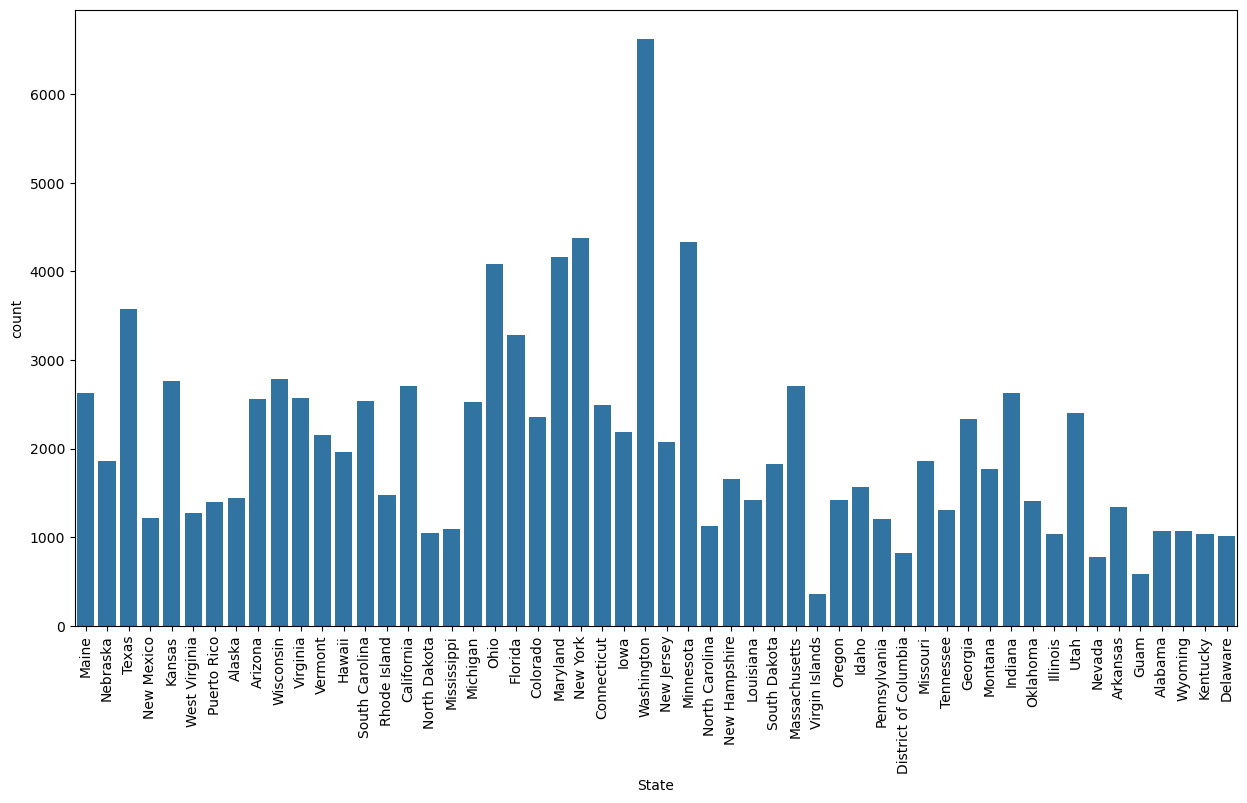

In [12]:
plt.figure(figsize= (15,8))
sns.countplot(df  , x = 'State')
plt.xticks(rotation=90 )
plt.show()
# note the state with the most values is Washington

In [13]:
# number of unique value in "Sex" column 
df['Sex'].nunique()

2

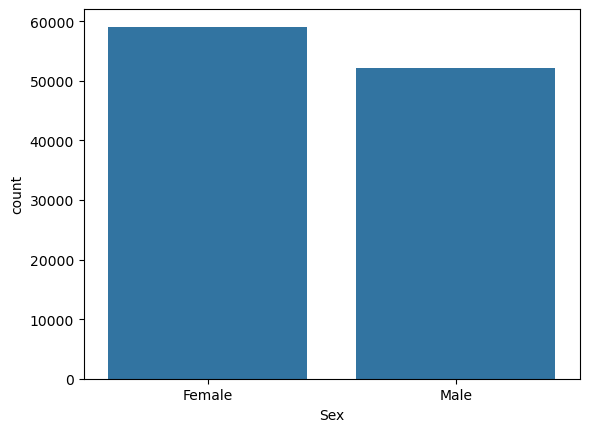

In [14]:
sns.countplot(df , x = 'Sex')
plt.show()
# more female than male

In [15]:
# # number of unique value in "GeneralHealth" column
df['GeneralHealth'].nunique()

5

In [16]:
# values 
df['GeneralHealth'].unique()

array(['Very good', 'Excellent', 'Good', nan, 'Fair', 'Poor'],
      dtype=object)

In [17]:
dff = df['GeneralHealth'].value_counts()
dff

GeneralHealth
Very good    37246
Good         35870
Excellent    17987
Fair         15009
Poor          4872
Name: count, dtype: int64

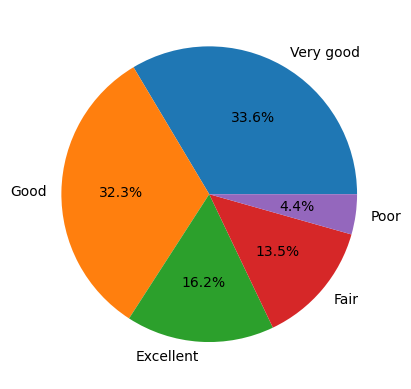

In [18]:
plt.pie(dff.values , labels=dff.index  ,autopct= '%1.1f%%')
plt.show()
# most value is very good

In [19]:
# number of unique value in "PhysicalHealthDays" column
df['PhysicalHealthDays'].nunique()

31

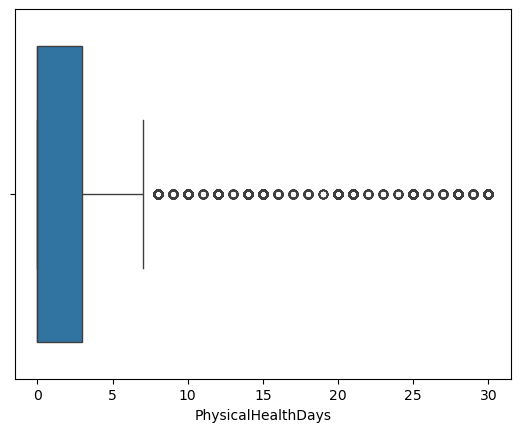

In [20]:
# Number of days in the past month where physical health was not good.
sns.boxplot(df , x = 'PhysicalHealthDays')
plt.show()
# most value indicate that people was good

In [21]:
# number of unique value in "MentalHealthDays" column
df['MentalHealthDays'].nunique()

31

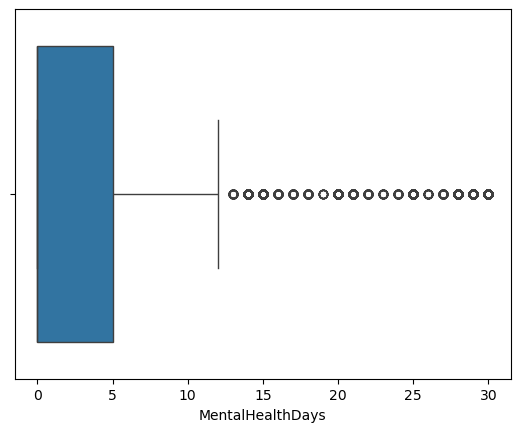

In [22]:
# there is most value from 0 to 5
sns.boxplot(df , x = 'MentalHealthDays')
plt.show()

In [23]:
# number of unique value in "LastCheckupTime" column
df['LastCheckupTime'].nunique()

4

In [24]:
# values
df['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)',
       'Within past 2 years (1 year but less than 2 years ago)',
       '5 or more years ago',
       'Within past 5 years (2 years but less than 5 years ago)', nan],
      dtype=object)

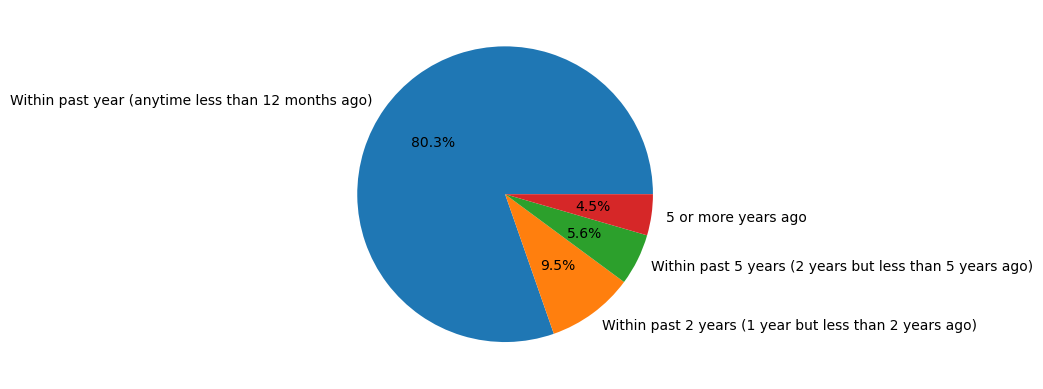

In [25]:
dff = df['LastCheckupTime'].value_counts()
plt.pie(dff.values , labels=dff.index  ,autopct= '%1.1f%%')
plt.show()
# most value is 'Within past year (anytime less than 12 months ago)

In [26]:
# values for PhysicalActivities column
df['PhysicalActivities'].unique()

array(['Yes', 'No', nan], dtype=object)

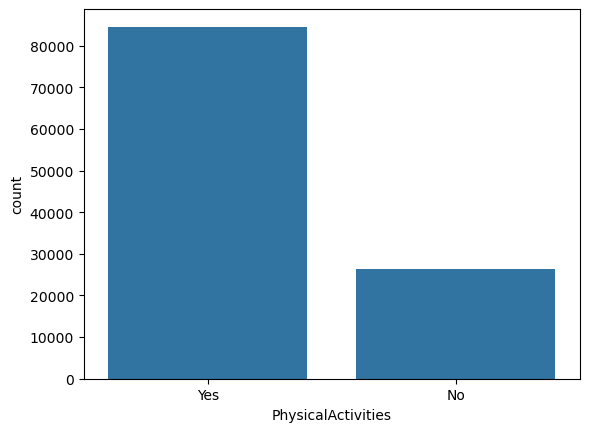

In [27]:
sns.countplot(df, x ='PhysicalActivities' )
plt.show()# most people do physical activities 

In [28]:
df['SleepHours'].unique()

array([ 8.,  5.,  6.,  7.,  4., 10.,  9., nan,  3., 12., 20., 24., 16.,
       11.,  2.,  1., 18., 14., 15., 22., 13., 17., 23., 21., 19.])

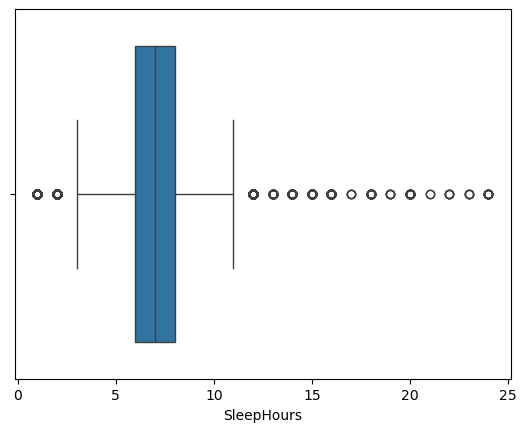

In [29]:
sns.boxplot(df , x = 'SleepHours')
plt.show()
# there is denisty value from 6 to 8 hours

In [30]:
# values for RemovedTeeth column
df['RemovedTeeth'].unique()

array(['None of them', '1 to 5', '6 or more, but not all', 'All', nan],
      dtype=object)

<Axes: xlabel='RemovedTeeth', ylabel='count'>

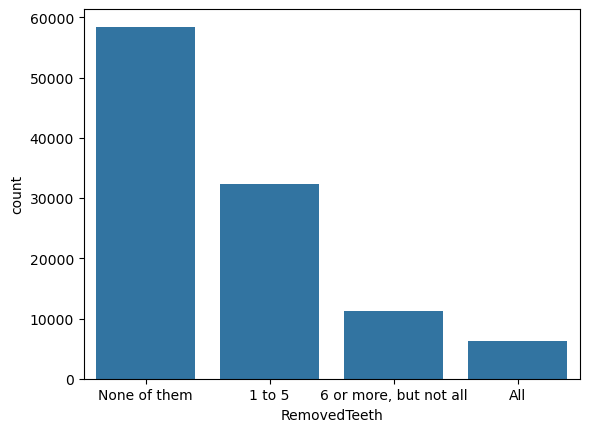

In [31]:
sns.countplot(df , x = 'RemovedTeeth' ) # most value is none of them

In [32]:
# this data frame if you have disease or no
df_HadDisease = df[['HadAngina', 'HadStroke','HadAsthma' , 'HadSkinCancer', 'HadCOPD','HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis','HadDiabetes']]
df_HadDisease

HadAngina HadStroke HadAsthma HadSkinCancer HadCOPD  \
0             No        No        No            No      No   
1             No        No        No            No      No   
2             No        No        No            No      No   
3             No        No        No            No      No   
4             No        No        No            No      No   
...          ...       ...       ...           ...     ...   
111272        No        No        No            No      No   
111273        No        No        No            No      No   
111274        No        No        No            No      No   
111275        No        No        No            No      No   
111276        No        No        No            No      No   

       HadDepressiveDisorder HadKidneyDisease HadArthritis HadDiabetes  
0                         No               No           No          No  
1                        Yes               No          Yes          No  
2                        Yes               No           No          No  
3                         No              Yes          Yes          No  
4                         No               No           No          No  
...                      ...              ...          ...         ...  
111272                    No               No           No          No  
111273                    No               No           No          No  
111274                    No               No           No          No  
111275                    No               No           No          No  
111276                   NaN               No           No          No  

[111277 rows x 9 columns]

In [33]:
# count of values
for col in df_HadDisease:
    print(df_HadDisease[col].value_counts())

HadAngina
No     103577
Yes      6634
Name: count, dtype: int64
HadStroke
No     106131
Yes      4764
Name: count, dtype: int64
HadAsthma
No     94285
Yes    16555
Name: count, dtype: int64
HadSkinCancer
No     101713
Yes      8795
Name: count, dtype: int64
HadCOPD
No     101811
Yes      8914
Name: count, dtype: int64
HadDepressiveDisorder
No     87755
Yes    22822
Name: count, dtype: int64
HadKidneyDisease
No     105654
Yes      5147
Name: count, dtype: int64
HadArthritis
No     72854
Yes    37767
Name: count, dtype: int64
HadDiabetes
No                                         92203
Yes                                        15269
No, pre-diabetes or borderline diabetes     2616
Yes, but only during pregnancy (female)      921
Name: count, dtype: int64


In [34]:
# function to modify HadDiabetes column 
def modify_HadDiabetes_col (row):
    if type(row) == str:
        if row == 'No, pre-diabetes or borderline diabetes' :
            return 'PreD or BorD'
        elif row == "Yes, but only during pregnancy (female)" :
            return 'PregD'
        else:
            return row       

In [35]:
df['HadDiabetes'] = df['HadDiabetes'].apply(modify_HadDiabetes_col)

In [36]:
# new value in HadDiabetes column 
df.HadDiabetes.value_counts()

HadDiabetes
No              92203
Yes             15269
PreD or BorD     2616
PregD             921
Name: count, dtype: int64

In [37]:
df_HadDisease = df[['HadAngina', 'HadStroke','HadAsthma' , 'HadSkinCancer', 'HadCOPD','HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis','HadDiabetes']]
df_HadDisease

HadAngina HadStroke HadAsthma HadSkinCancer HadCOPD  \
0             No        No        No            No      No   
1             No        No        No            No      No   
2             No        No        No            No      No   
3             No        No        No            No      No   
4             No        No        No            No      No   
...          ...       ...       ...           ...     ...   
111272        No        No        No            No      No   
111273        No        No        No            No      No   
111274        No        No        No            No      No   
111275        No        No        No            No      No   
111276        No        No        No            No      No   

       HadDepressiveDisorder HadKidneyDisease HadArthritis HadDiabetes  
0                         No               No           No          No  
1                        Yes               No          Yes          No  
2                        Yes               No           No          No  
3                         No              Yes          Yes          No  
4                         No               No           No          No  
...                      ...              ...          ...         ...  
111272                    No               No           No          No  
111273                    No               No           No          No  
111274                    No               No           No          No  
111275                    No               No           No          No  
111276                   NaN               No           No          No  

[111277 rows x 9 columns]

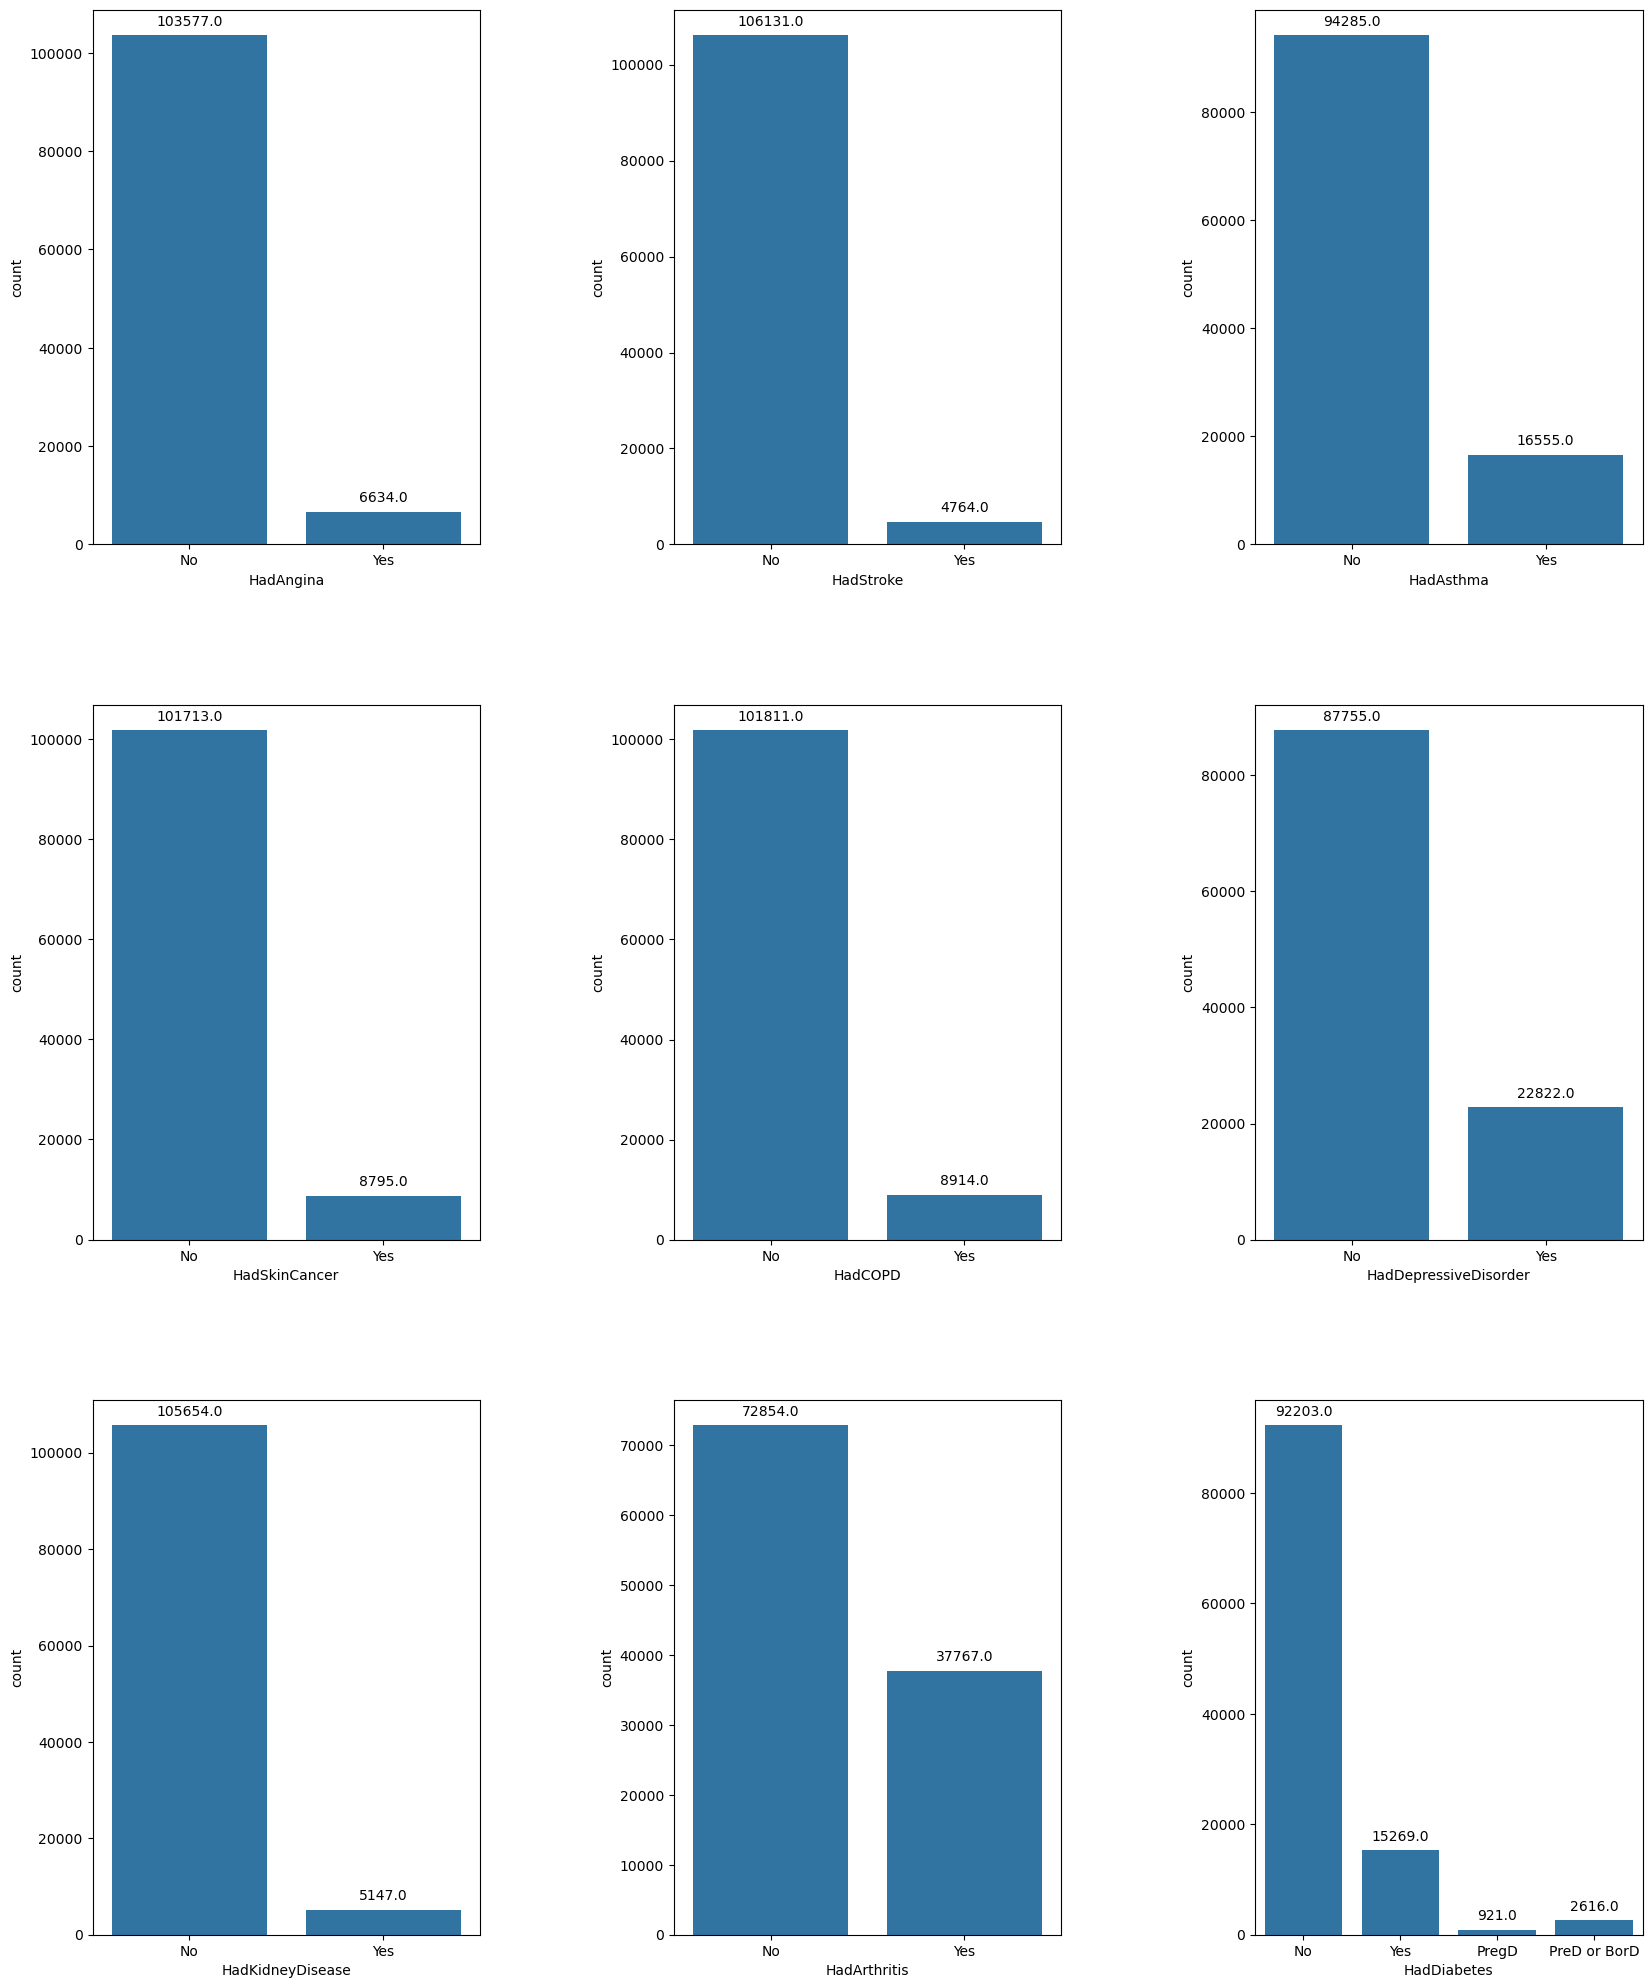

In [38]:
# subplot to all diseases
plt.figure(figsize= (20,25))
plt.subplots_adjust(hspace=0.3 ,wspace =0.5 )
for i, cat in enumerate (df_HadDisease, 1):
    plt.subplot (3,3, i)
    ax = sns.countplot(x=df_HadDisease[cat] )
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [39]:
px.histogram(df.HadHeartAttack)

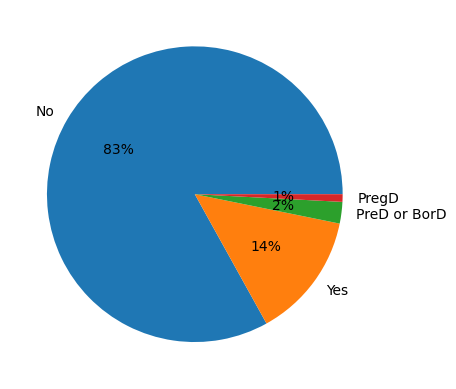

In [40]:
# pie chart to shows percentage of values in HadDiabetes column
dff = df.HadDiabetes.value_counts()
plt.pie(dff.values , labels=dff.index  ,autopct= '%1.f%%')
plt.show()



In [41]:
# new data fram about another diseases
dfc=df[['DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands']]
dfc

DeafOrHardOfHearing BlindOrVisionDifficulty DifficultyConcentrating  \
0                       No                      No                      No   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                       No                      No                      No   
4                       No                      No                      No   
...                    ...                     ...                     ...   
111272                  No                      No                      No   
111273                  No                      No                      No   
111274                  No                      No                      No   
111275                  No                      No                      No   
111276                  No                      No                      No   

       DifficultyWalking DifficultyDressingBathing DifficultyErrands  
0                     No                        No                No  
1                    NaN                       NaN               NaN  
2                    NaN                       NaN               NaN  
3                     No                        No                No  
4                     No                        No                No  
...                  ...                       ...               ...  
111272                No                        No                No  
111273                No                        No                No  
111274                No                        No                No  
111275                No                        No                No  
111276                No                        No                No  

[111277 rows x 6 columns]

In [42]:
# count of values dfc
for col in dfc:
    print(dfc[col].value_counts())

DeafOrHardOfHearing
No     96404
Yes     9804
Name: count, dtype: int64
BlindOrVisionDifficulty
No     100142
Yes      5794
Name: count, dtype: int64
DifficultyConcentrating
No     92762
Yes    12575
Name: count, dtype: int64
DifficultyWalking
No     88361
Yes    16950
Name: count, dtype: int64
DifficultyDressingBathing
No     101175
Yes      4195
Name: count, dtype: int64
DifficultyErrands
No     96829
Yes     8085
Name: count, dtype: int64


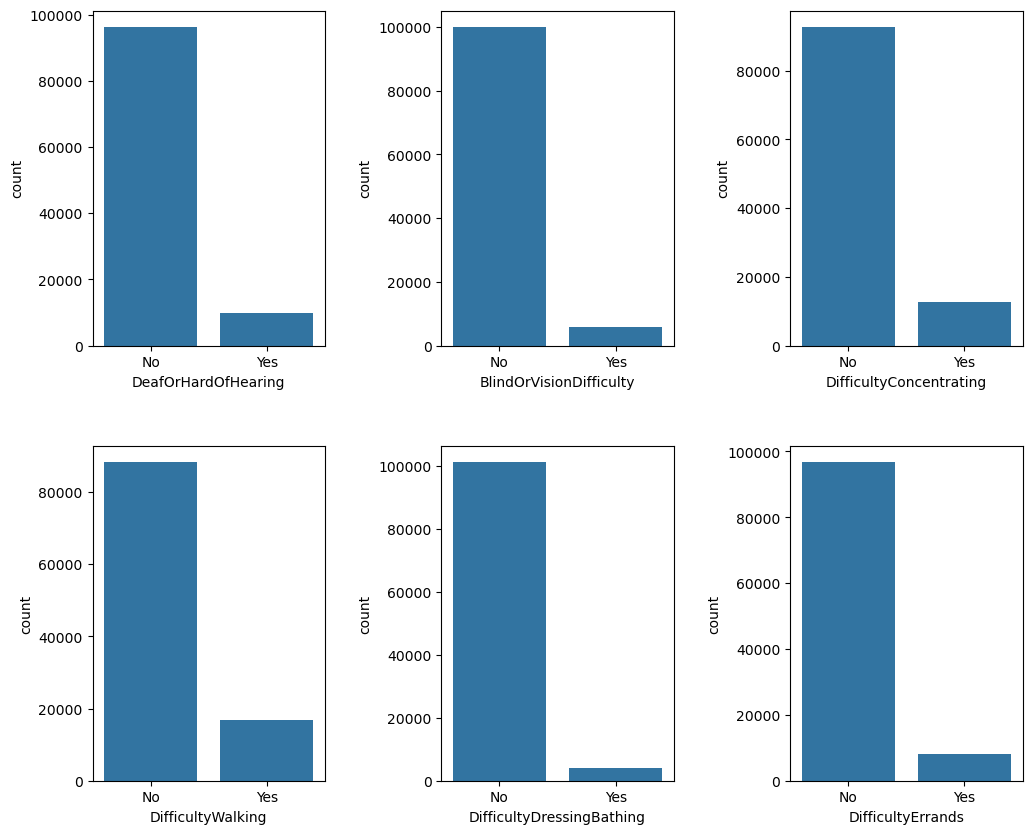

In [43]:
# subplots to the another diseases and note most value is "no" in all graphs
plt.figure(figsize= (12,10))
plt.subplots_adjust(hspace=0.3 ,wspace =0.5 )
for i, cat in enumerate (dfc, 1):
    plt.subplot (2,3, i)
    sns.countplot(x=dfc[cat] )

In [44]:
# values for SmokerStatus column 
df.SmokerStatus.value_counts()

SmokerStatus
Never smoked                             61543
Former smoker                            28486
Current smoker - now smokes every day     9006
Current smoker - now smokes some days     3432
Name: count, dtype: int64

In [45]:
# modify SmokerStatus column
def modify_SmokerStatus (row):
    if type(row) == str :
        if row == 'Never smoked':
            return 'NS'
        elif row == 'Former smoker' :
            return 'FS'
        elif row == 'Current smoker - now smokes every day':
            return 'ED'
        elif row == 'Current smoker - now smokes some days' :
            return "SD"
    
df['SmokerStatus'] =df['SmokerStatus'].apply(modify_SmokerStatus)
df['SmokerStatus'].value_counts()

SmokerStatus
NS    61543
FS    28486
ED     9006
SD     3432
Name: count, dtype: int64

In [46]:
# values for ECigaretteUsage column 
df.ECigaretteUsage.value_counts()

ECigaretteUsage
Never used e-cigarettes in my entire life    77937
Not at all (right now)                       19029
Use them some days                            2895
Use them every day                            2556
Name: count, dtype: int64

In [47]:
# modify ECigaretteUsage column
def modify_ECigaretteUsage (row):
    if type(row) == str :
        if row == 'Never used e-cigarettes in my entire life':
            return 'NU'
        elif row == 'Not at all (right now)' :
            return 'N/A (RN)'
        elif row == 'Use them some days':
            return 'SD'
        elif row == 'Use them every day' :
            return "ED"
    
df['ECigaretteUsage'] =df['ECigaretteUsage'].apply(modify_ECigaretteUsage)
df['ECigaretteUsage'].value_counts()

ECigaretteUsage
NU          77937
N/A (RN)    19029
SD           2895
ED           2556
Name: count, dtype: int64

In [48]:
# values for AlcoholDrinkers column 
df.AlcoholDrinkers.value_counts()

AlcoholDrinkers
Yes    52870
No     46795
Name: count, dtype: int64

In [49]:
df_smokers = df[['SmokerStatus' , 'ECigaretteUsage' , 'AlcoholDrinkers']]

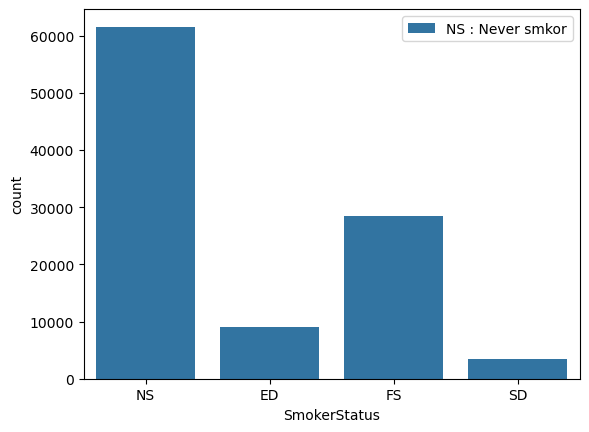

In [50]:
sns.countplot(x=df["SmokerStatus"])
plt.legend(labels={"NS : Never smkor"})


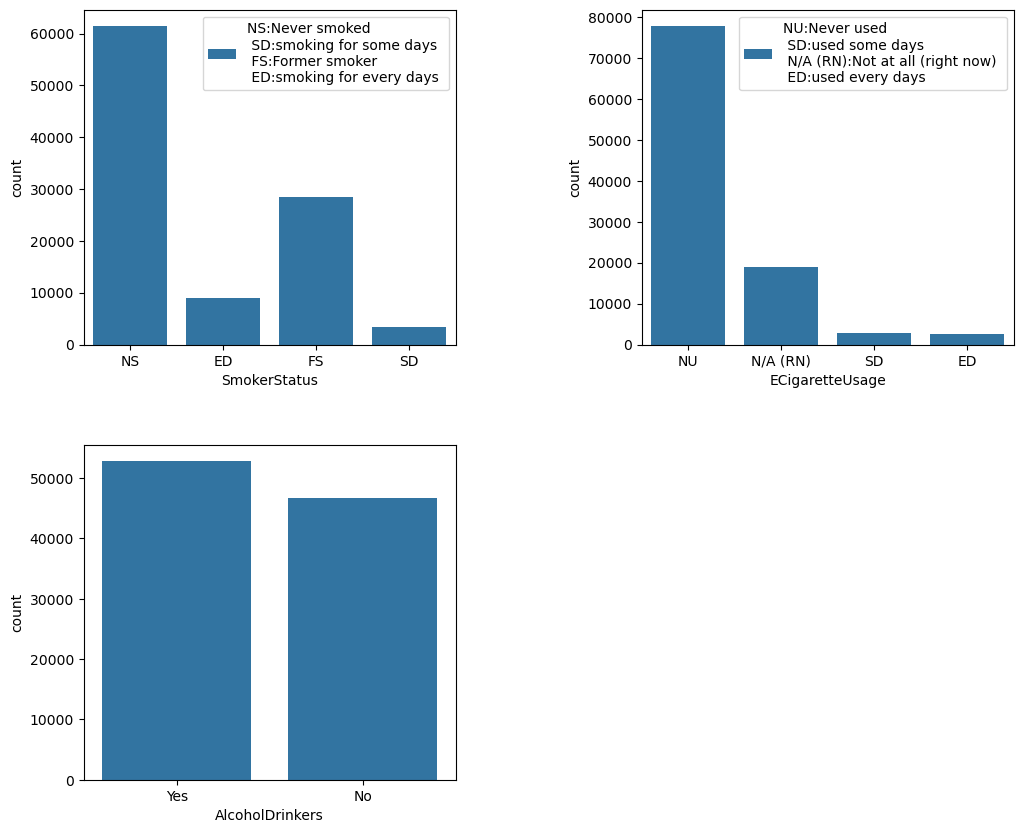

In [51]:
# subplots to the state of smoking , ECigarette and AlcoholDrinkers 
#note in the first graph most value about smoker status is NS 'never smoking' 
#note in the second graprh most value about ECigarette usage is NU 'never used' 
#note in the third graprh most value about AlcoholDrinkers is 'yes' 

plt.figure(figsize= (12,10))
plt.subplots_adjust(hspace=0.3 ,wspace =0.5 )
for i, cat in enumerate (df_smokers, 1):
    plt.subplot (2,2, i)
    sns.countplot(x=df_smokers[cat] )
    if i == 1 :
        plt.legend({'NS:Never smoked \n SD:smoking for some days \n FS:Former smoker \n ED:smoking for every days '})
    elif i==2 :
        plt.legend({'NU:Never used \n SD:used some days \n N/A (RN):Not at all (right now) \n ED:used every days '})
        

In [52]:
# values for ChestScan column 
df.ChestScan.value_counts()

ChestScan
No     55880
Yes    41451
Name: count, dtype: int64

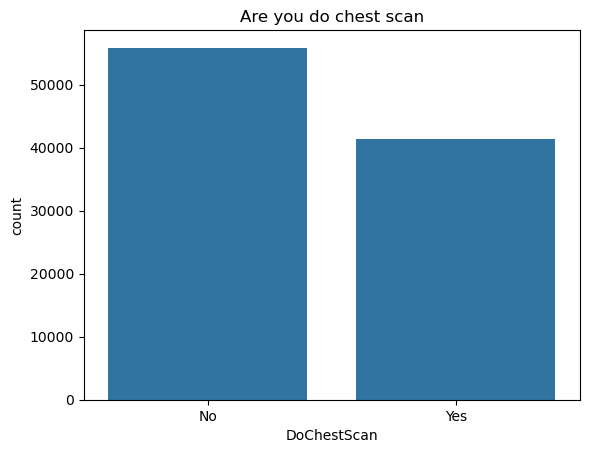

In [53]:
sns.countplot(df , x='ChestScan')
plt.title("Are you do chest scan")
plt.xlabel('DoChestScan')
plt.show()
# the most value is NO 

In [54]:
# values for RaceEthnicityCategory column 
df.RaceEthnicityCategory.value_counts()

RaceEthnicityCategory
White only, Non-Hispanic         80151
Hispanic                         10666
Black only, Non-Hispanic          8827
Other race only, Non-Hispanic     5704
Multiracial, Non-Hispanic         2409
Name: count, dtype: int64

In [55]:
# function to modify RaceEthnicityCategory column
def modify_RaceEthnicityCategory (row):
    if type(row) == str :
        if row == 'White only, Non-Hispanic':
            return 'W-NH'
        elif row == 'Hispanic' :
            return 'H'
        elif row == 'Black only, Non-Hispanic':
            return 'B-NH'
        elif row == 'Other race only, Non-Hispanic' :
            return "Other-NH"
        elif row == 'Multiracial, Non-Hispanic' :
            return "Multi-NH"
    
df['RaceEthnicityCategory'] =df['RaceEthnicityCategory'].apply(modify_RaceEthnicityCategory)
df['RaceEthnicityCategory'].value_counts()

RaceEthnicityCategory
W-NH        80151
H           10666
B-NH         8827
Other-NH     5704
Multi-NH     2409
Name: count, dtype: int64

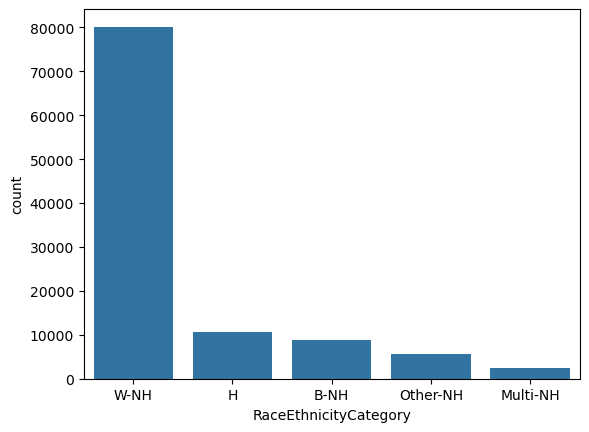

In [56]:
sns.countplot(df , x='RaceEthnicityCategory')
plt.show()
# the most people is W-NH 'white and non hispanic'

In [57]:
# values for AgeCategory column 
df.AgeCategory.value_counts()

AgeCategory
Age 65 to 69       11760
Age 60 to 64       11065
Age 70 to 74       10797
Age 80 or older     9100
Age 55 to 59        9086
Age 50 to 54        8551
Age 75 to 79        8229
Age 40 to 44        7464
Age 45 to 49        7123
Age 35 to 39        7110
Age 18 to 24        6807
Age 30 to 34        6312
Age 25 to 29        5542
Name: count, dtype: int64

In [58]:
# function to modify AgeCategory column
def modify_age (row):
    if type(row) == str :
        row = row.lstrip("Age ").replace(' to ' , "-")
        return row

In [59]:
# values modified
df['AgeCategory'] = df['AgeCategory'].apply(modify_age)
df['AgeCategory'].value_counts()

AgeCategory
65-69          11760
60-64          11065
70-74          10797
80 or older     9100
55-59           9086
50-54           8551
75-79           8229
40-44           7464
45-49           7123
35-39           7110
18-24           6807
30-34           6312
25-29           5542
Name: count, dtype: int64

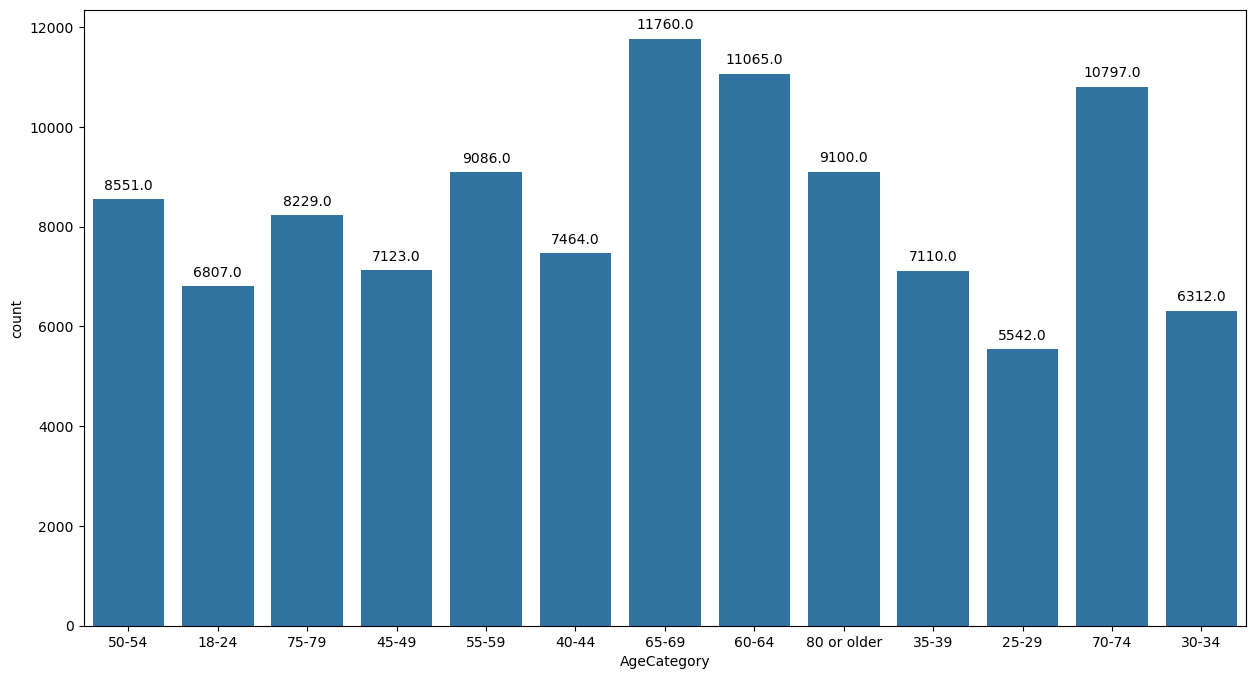

In [60]:
plt.figure(figsize= (15,8))
ax= sns.countplot(df , x='AgeCategory')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()
# the most category is from 65 to 69

- the most category is from 65 to 69

--------------------

In [61]:
# values for HeightInMeters column 
df.HeightInMeters.unique()

array([1.68, 1.6 ,  nan, 1.7 , 1.78, 1.5 , 1.8 , 1.65, 1.83, 1.57, 1.63,
       1.91, 1.75, 1.55, 1.73, 1.93, 1.88, 1.85, 1.52, 1.45, 1.96, 1.98,
       1.24, 2.11, 2.03, 2.01, 1.47, 1.42, 1.67, 1.35, 1.64, 1.76, 1.56,
       1.66, 1.49, 1.58, 1.69, 1.46, 2.06, 1.9 , 1.53, 1.05, 1.4 , 2.24,
       1.62, 1.74, 2.08, 1.72, 1.59, 1.84, 1.22, 0.91, 1.61, 1.3 , 1.03,
       1.79, 1.43, 2.  , 1.37, 1.77, 2.16, 1.54, 2.21, 1.86, 1.27, 1.51,
       2.18, 1.82, 1.32, 1.12, 2.13, 1.48, 1.81, 1.04, 1.33, 1.87, 1.71,
       1.16, 2.34, 1.2 , 1.19, 1.95, 1.14, 1.1 , 1.08, 1.89, 0.95, 2.26,
       1.07, 1.18, 1.15, 0.97, 1.25])

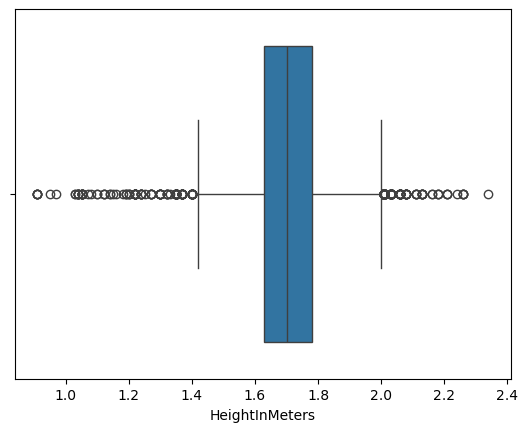

In [62]:
# most value from 1.6 to 1.7 
sns.boxplot(df , x ='HeightInMeters')
plt.show()

In [63]:
# values for WeightInKilograms column 
df.WeightInKilograms.unique()

array([ 66.22,  54.43,    nan,  63.5 ,  68.04,  69.4 ,  86.18,  81.65,
        59.87,  76.2 ,  82.1 ,  78.02,  72.57,  97.52,  57.15,  77.56,
        88.  ,  77.11,  67.59, 113.4 ,  61.69, 136.08,  44.45,  99.79,
        79.38,  88.45,  95.25,  74.84, 122.47,  58.97,  62.14,  83.91,
        65.32,  70.76,  87.09, 127.01,  62.6 , 104.33,  92.99,  76.66,
       101.6 ,  61.23,  70.31,  55.34, 117.93, 121.11,  89.81,  56.7 ,
       106.59, 108.86,  94.35,  90.72,  65.77,  75.75, 149.69,  84.82,
        40.82,  82.55,  66.68, 110.68,  63.96,  91.63, 102.06,  43.54,
        71.67,  80.  ,  93.44,  71.21, 101.15,  58.06, 114.31, 131.54,
        93.89,  47.63,  52.16,  87.54,  60.33,  83.01, 106.14, 107.5 ,
        79.83, 125.19,  70.  , 105.23,  80.74, 134.72,  59.42,  96.16,
       121.56,  95.71,  67.13,  36.29,  72.12,  50.8 , 112.49,  91.17,
        60.78,  75.3 , 181.44,  73.94, 154.22, 120.  , 124.28, 107.95,
       138.35, 107.05,  94.8 , 109.77,  64.41,  63.05,  68.95,  57.61,
      

In [64]:
df.WeightInKilograms.describe()

count    100873.000000
mean         83.036047
std          21.384599
min          22.680000
25%          68.040000
50%          80.740000
75%          95.250000
max         290.300000
Name: WeightInKilograms, dtype: float64

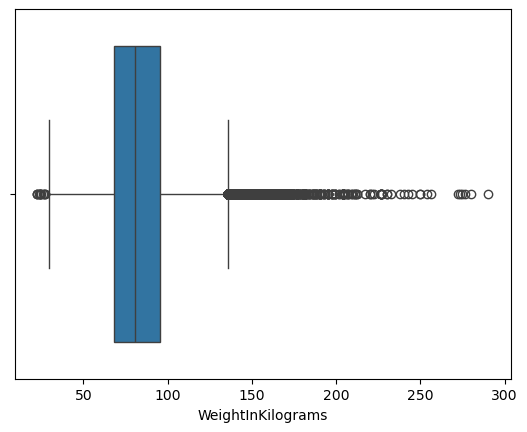

In [65]:
sns.boxplot(df , x ='WeightInKilograms')
plt.show()
# most value from 68 to 95 

In [66]:
# values for BMI column 
df.BMI.unique()

array([23.56, 21.26,   nan, ..., 59.7 , 54.64, 16.68])

In [67]:
df.BMI.isna().sum()

12073

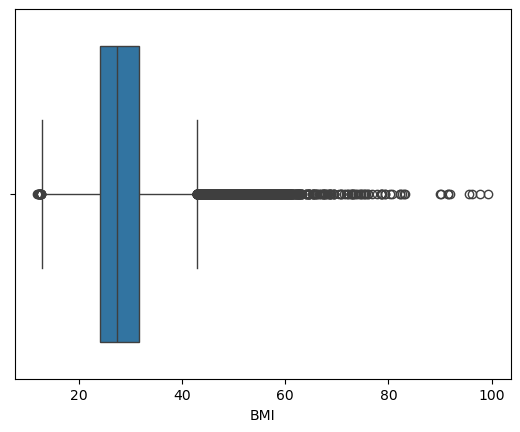

In [68]:
sns.boxplot(df , x ='BMI')
plt.show()
# most value from 24.13 to 31.75 

In [69]:
# data frame about if you take the vaccine or not  
df_vaccine=df[['HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos']]

In [70]:
# values for vaccine data fram 
for col in df_vaccine.columns:
    print(df_vaccine[col].value_counts())

HIVTesting
No     62727
Yes    32076
Name: count, dtype: int64
FluVaxLast12
Yes    52225
No     47334
Name: count, dtype: int64
PneumoVaxEver
No     54185
Yes    38021
Name: count, dtype: int64
TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    30290
Yes, received tetanus shot but not sure what type            28641
Yes, received Tdap                                           24970
Yes, received tetanus shot, but not Tdap                      6835
Name: count, dtype: int64
HighRiskLastYear
No     94469
Yes     4203
Name: count, dtype: int64
CovidPos
No                                                               67583
Yes                                                              27675
Tested positive using home test without a health professional     3388
Name: count, dtype: int64


In [71]:
# function to modify TetanusLast10Tdap
def modify_TetanusLast10Tdap (row):
    if type(row) == str :
        if row == 'No, did not receive any tetanus shot in the past 10 years':
            return 'No-Tet'
        elif row == 'Yes, received tetanus shot but not sure what type' :
            return 'Yes-Tet (Unsure type)'
        elif row == 'Yes, received Tdap':
            return 'Yes-Tdap'
        elif row == 'Yes, received tetanus shot, but not Tdap' :
            return "Yes-Tet (Not Tdap)"
df['TetanusLast10Tdap'] =df['TetanusLast10Tdap'].apply(modify_TetanusLast10Tdap)
df['TetanusLast10Tdap'].value_counts()

TetanusLast10Tdap
No-Tet                   30290
Yes-Tet (Unsure type)    28641
Yes-Tdap                 24970
Yes-Tet (Not Tdap)        6835
Name: count, dtype: int64

In [72]:
# function to modify CovidPos
def modify_CovidPos (row):
    if type(row) == str :
        if row == 'Tested positive using home test without a health professional':
            return 'PosHomeTest'
        else :
            return row
df['CovidPos'] =df['CovidPos'].apply(modify_CovidPos)
df['CovidPos'].value_counts()

CovidPos
No             67583
Yes            27675
PosHomeTest     3388
Name: count, dtype: int64

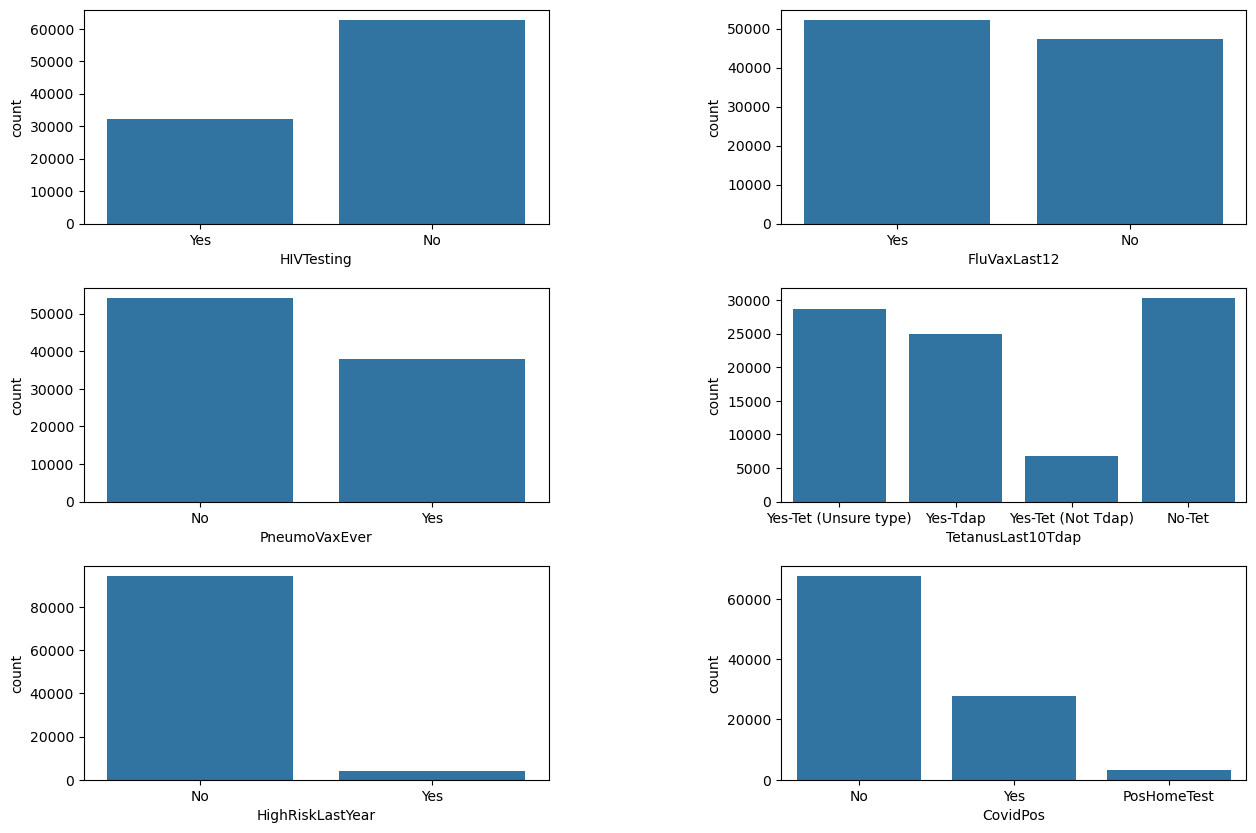

In [73]:
# subplots show if you take the vaccine or not
plt.figure(figsize= (15,10))
plt.subplots_adjust(hspace=0.3 ,wspace =0.5 )
for i, cat in enumerate (df_vaccine.columns, 1):
    plt.subplot (3,2, i)
    ax = sns.countplot(x=df[cat] )
# HIVTesting column the most value is 'NO'
# FluVaxLast12 column the most value is 'YES'
# PneumoVaxEver column the most value is 'NO'
# TetanusLast10Tdap column the most value is 'NO-Tet' it is not take vaccine
# HighRiskLastYear column the most value is 'NO' 
# CovidPos column the most value is 'NO'

# Feature Engineering


_make new column for person condition from __BMI__ column_

In [74]:
# new column about person condition and the count of values
def new_col (row):
    if row < 18.5 :
        return "UnderWeight"
    elif 18.5 <= row <= 24.99 :
        return "HealthyWeight"
    elif 25 <= row <= 29.99 :
        return "OverWeight"
    elif row >= 30 :
        return "Obesity"
df['PersonCondition(BMI)'] = df['BMI'].apply(new_col)
df['PersonCondition(BMI)'].value_counts()

PersonCondition(BMI)
OverWeight       35109
Obesity          33198
HealthyWeight    29215
UnderWeight       1682
Name: count, dtype: int64

<Axes: xlabel='PersonCondition(BMI)', ylabel='count'>

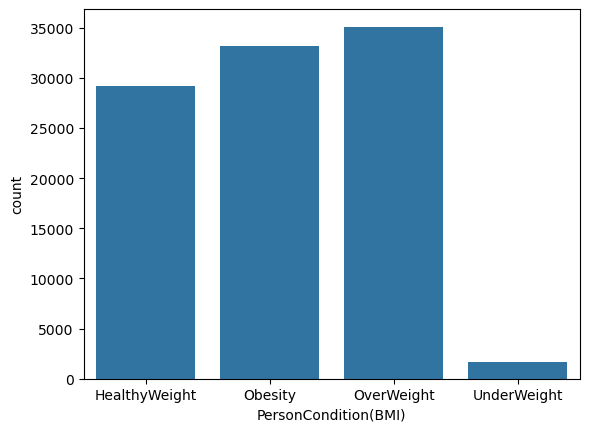

In [75]:
sns.countplot(df , x ='PersonCondition(BMI)')
# most value is Over weight

- Note:  most people are overweight

# save data as csv

In [76]:
pd.__version__

'2.1.1'

In [77]:
# new_df = df.to_csv("EDA to Heart disease.csv" , index=False)

In [78]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'PersonCondition(BMI)'],
      dtype='object')